# Random Forests for Supervised Learning
### ~ Keshav Krishna Singh



**Objective:**  
The goal of this notebook is to understand, implement, and visualize Random Forests—a powerful ensemble method used for classification and regression in supervised learning.  

Random Forests are widely used because they:  
- Improve accuracy compared to a single decision tree.  
- Reduce overfitting.  
- Provide feature importance insights.  

We will use a simple, classic dataset—predicting whether a customer buys a computer based on Age and Income.  


# Theory & Concepts

**Random Forest:**  
- An ensemble of Decision Trees.  
- Each tree is trained on a **random subset of data** (bootstrapping).  
- Each split considers a **random subset of features**.  

**Key Steps:**  
1. Create multiple bootstrap datasets from original data.  
2. Train a decision tree on each bootstrap dataset.  
3. For each node split, randomly select a subset of features to choose the best split.  
4. Aggregate predictions:  
   - Classification → Majority vote  
   - Regression → Average of predictions  

**Advantages:**  
- High accuracy  
- Robust to overfitting  
- Works for both numerical and categorical features  

**Metrics for Classification:**  
- Accuracy, Precision, Recall, F1-Score  
- Confusion Matrix  


### To learn and understand the basics, I have taken a handmade sample dataset to practice and implement the algorithm initially and will proceed with a proper dataset further.

### I am also adding the jpg image of my handwritten notes, can be referred for easy understanding and simple i

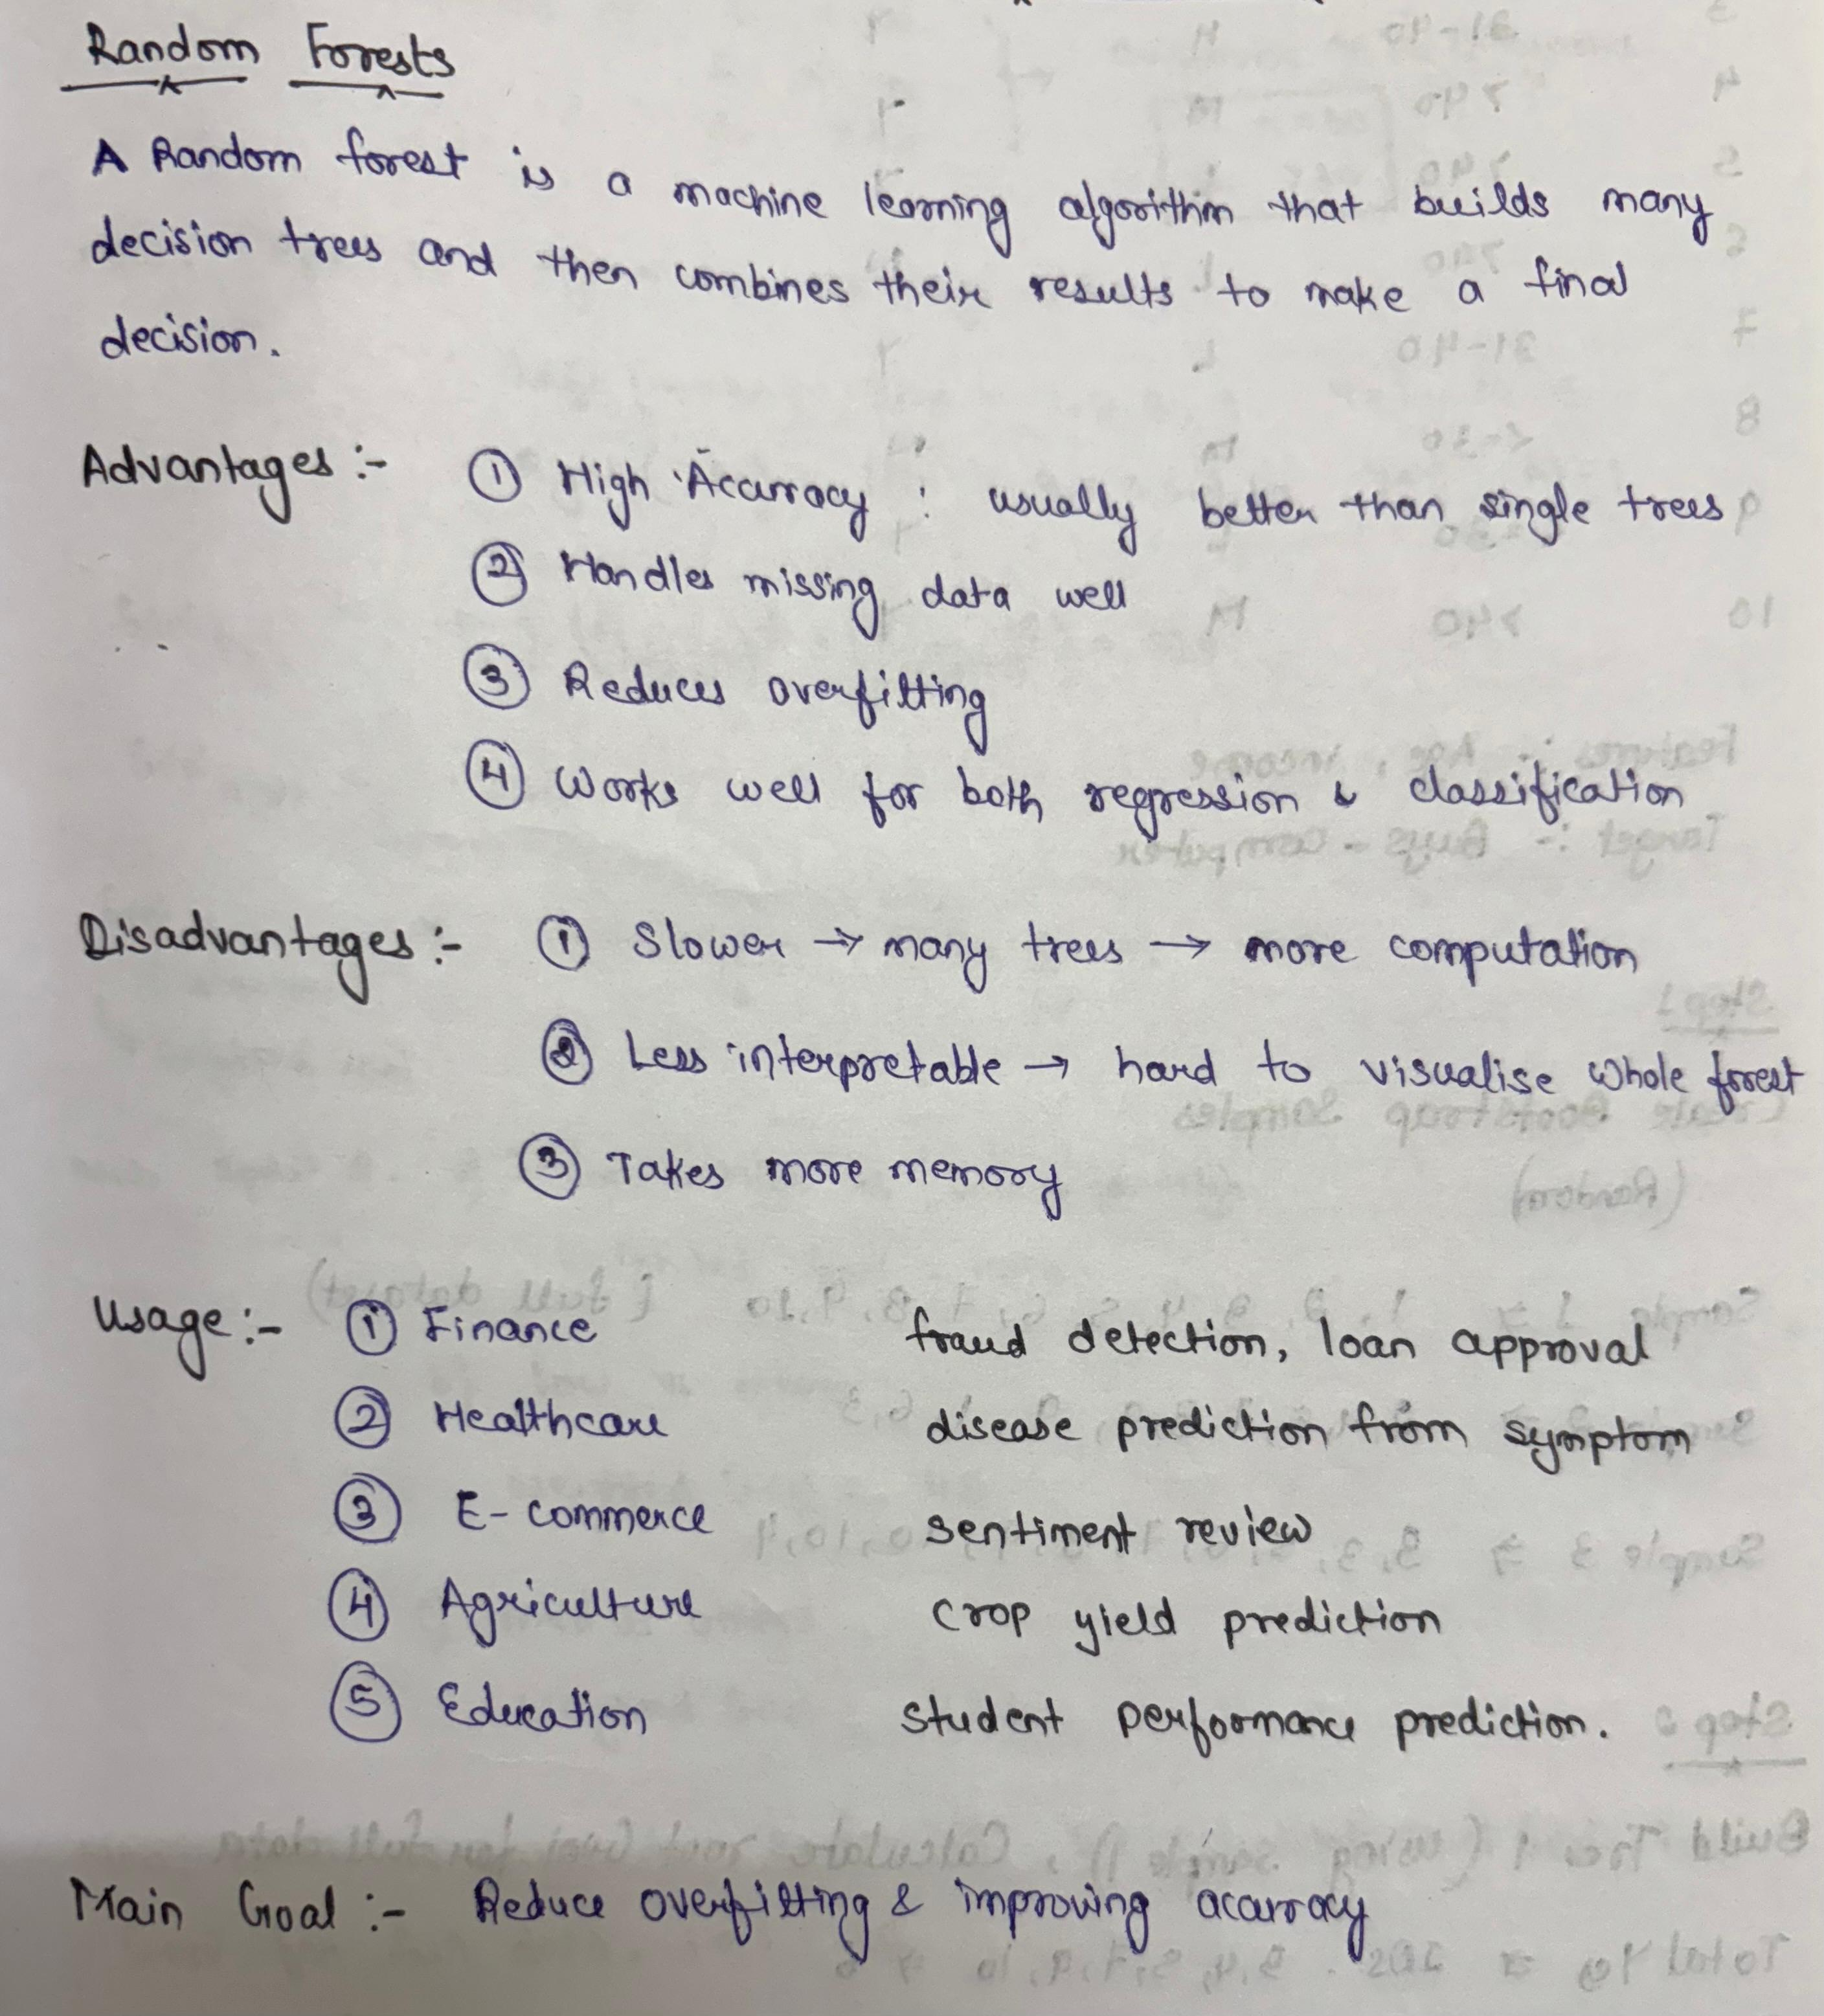

In [2]:
from IPython.display import Image, display

display(Image(filename=r"C:\Users\kesha\ML\anaconda_projects\db\My Jupyter Notebooks\Random_Forests\img (1).jpg", width=800, height=600))



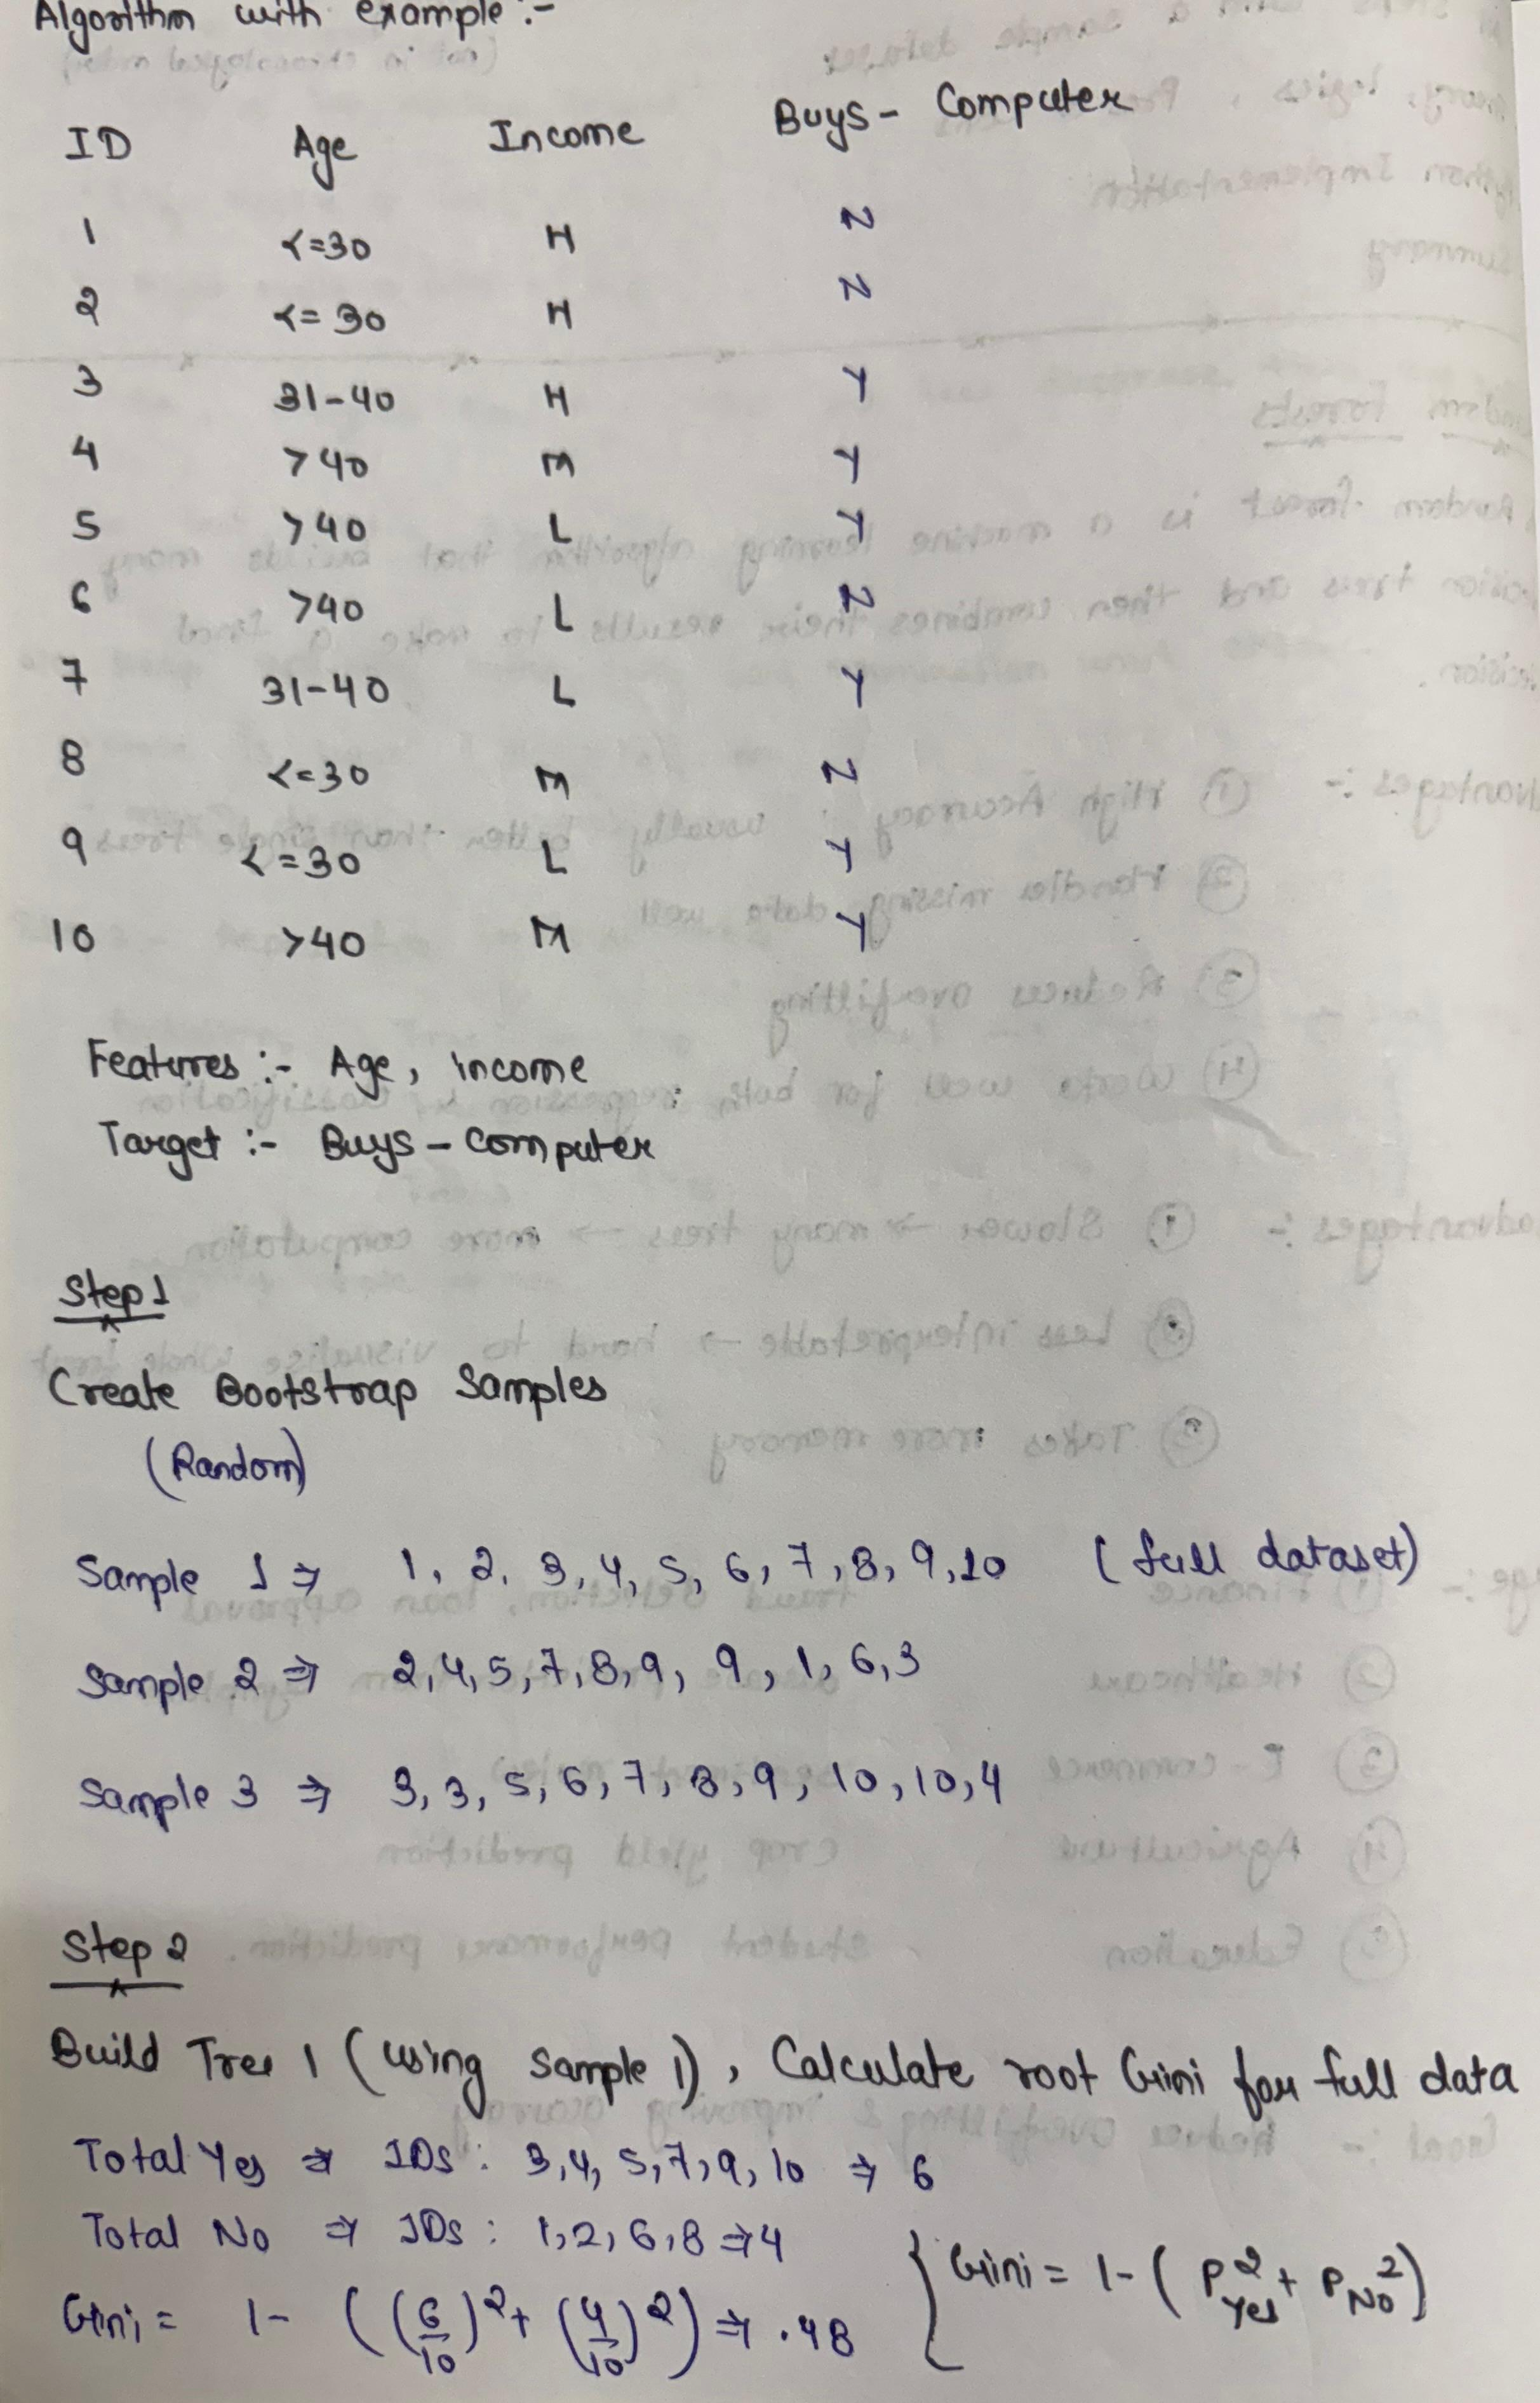

In [2]:
display(Image(filename=r"C:\Users\kesha\ML\anaconda_projects\db\My Jupyter Notebooks\Random_Forests\img (2).jpg", width=800, height=600))

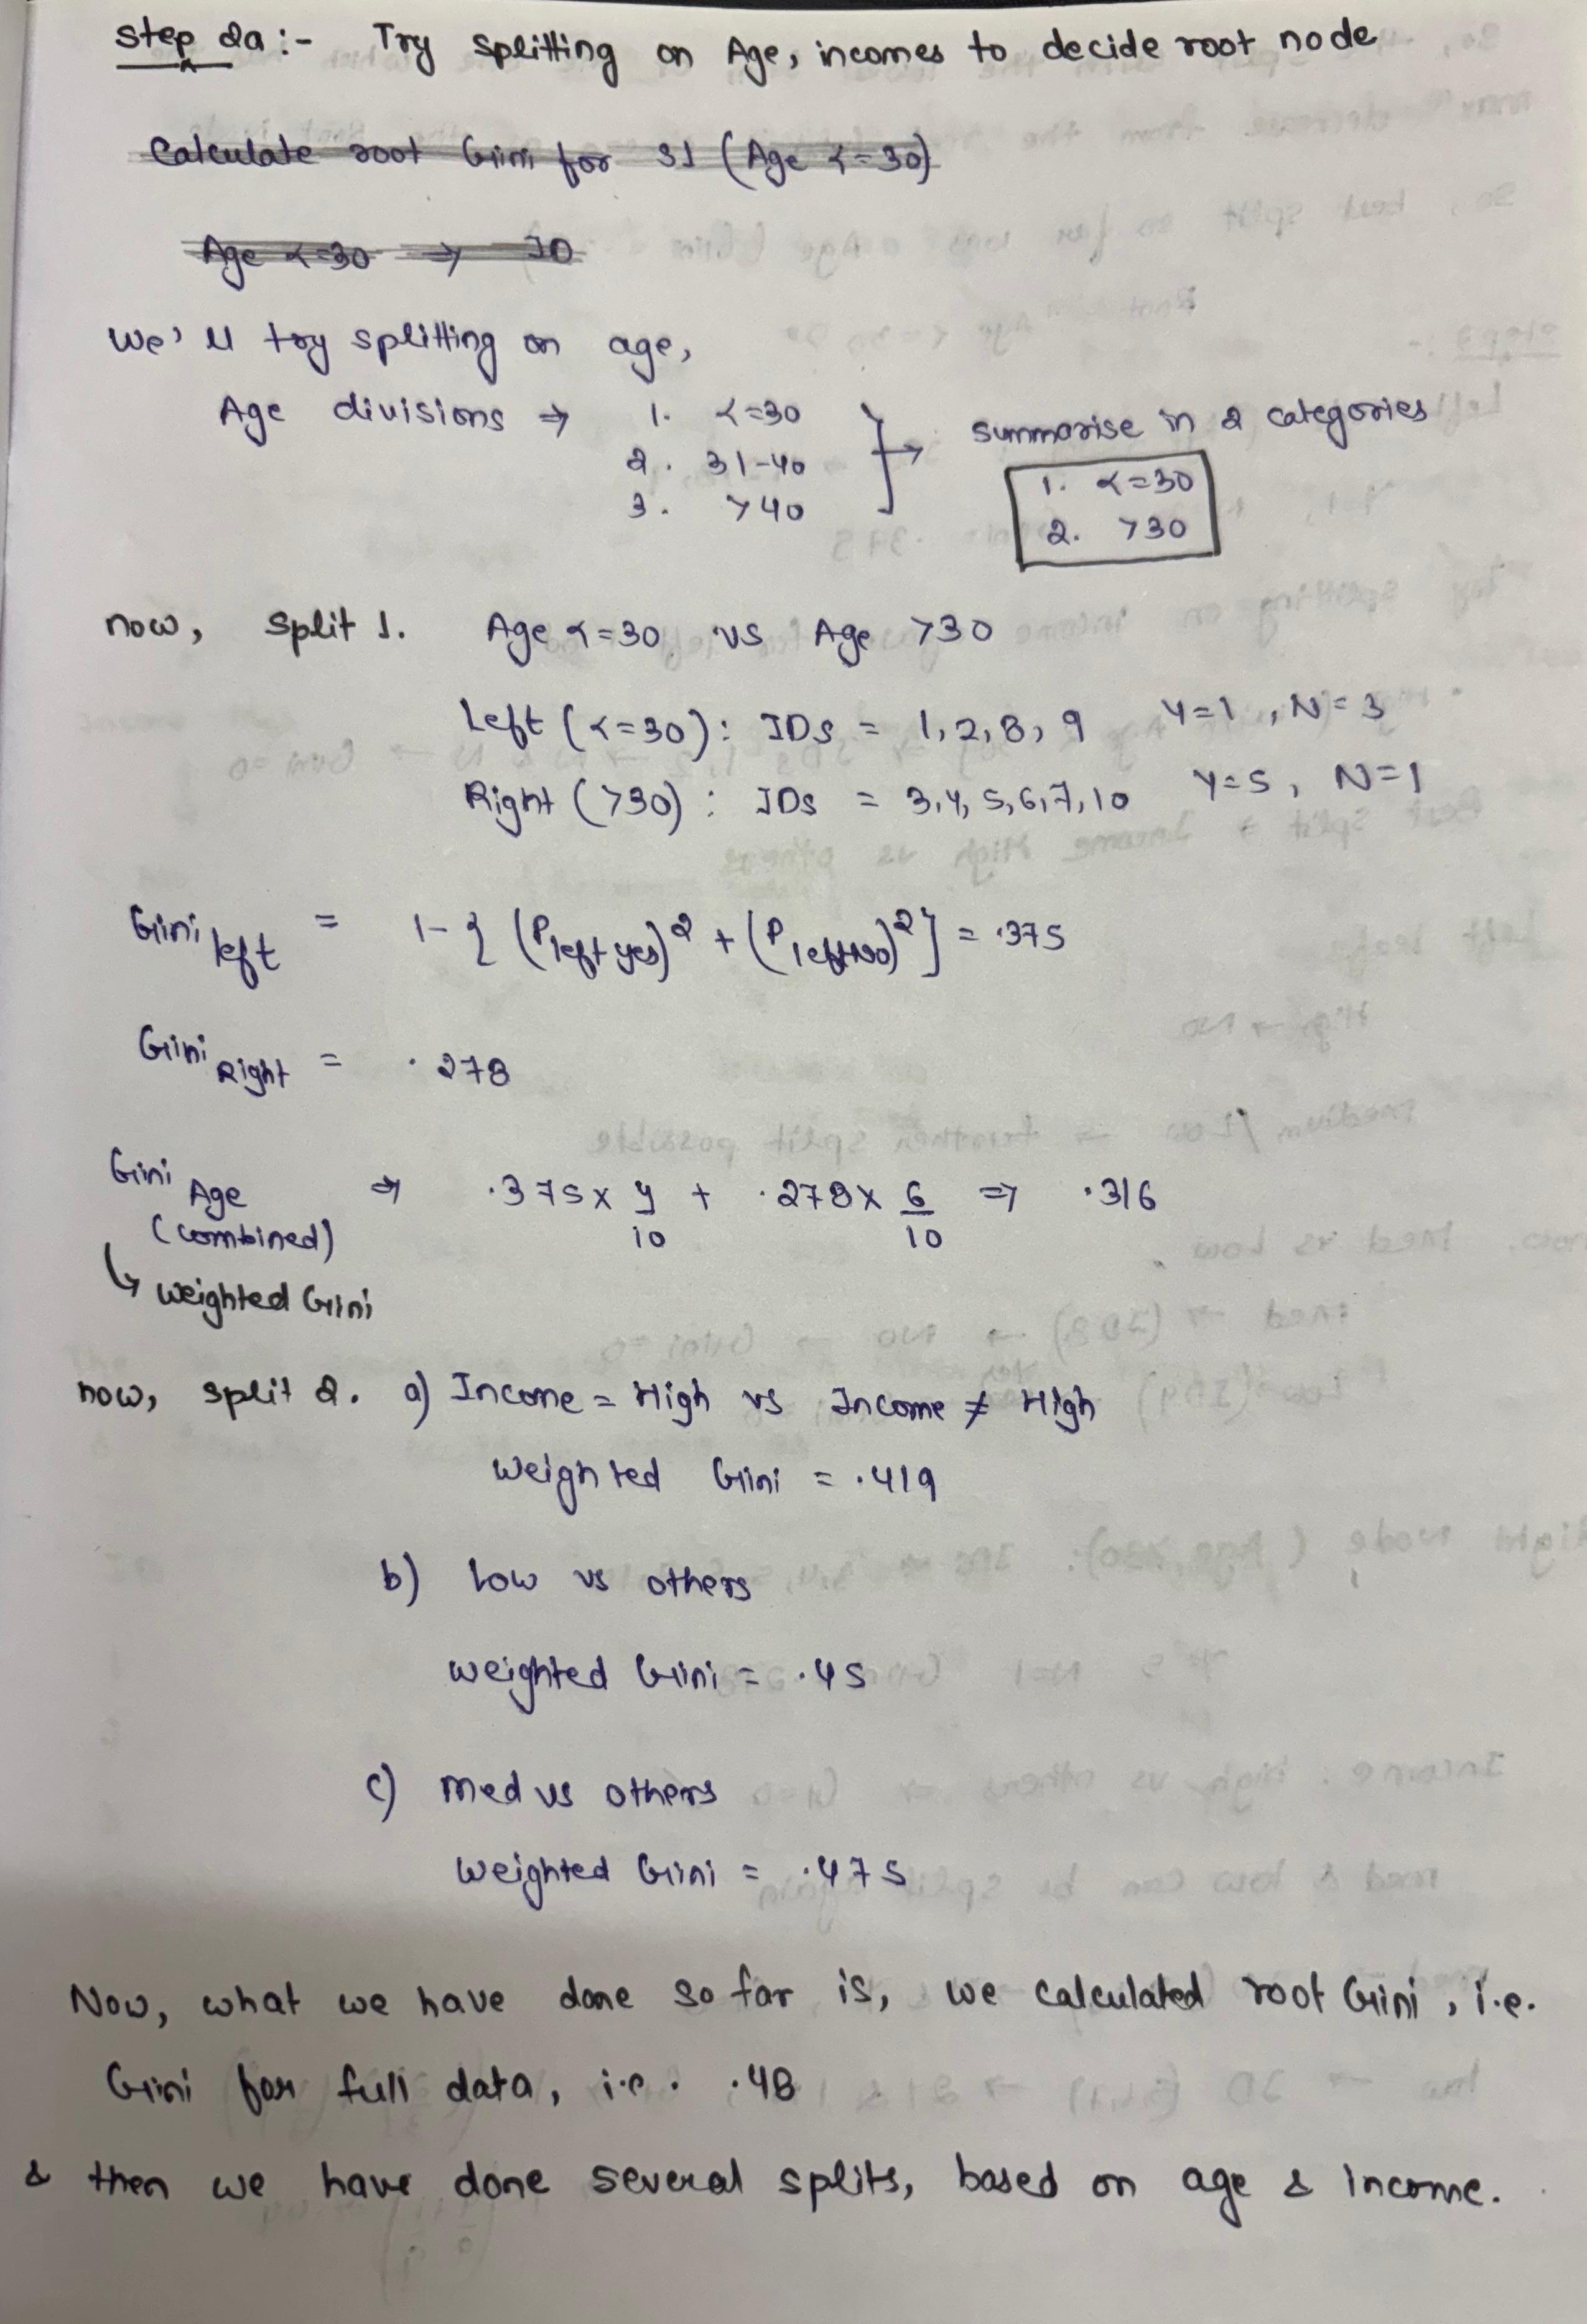

In [3]:
display(Image(filename=r"C:\Users\kesha\ML\anaconda_projects\db\My Jupyter Notebooks\Random_Forests\img (3).jpg", width=800, height=600))

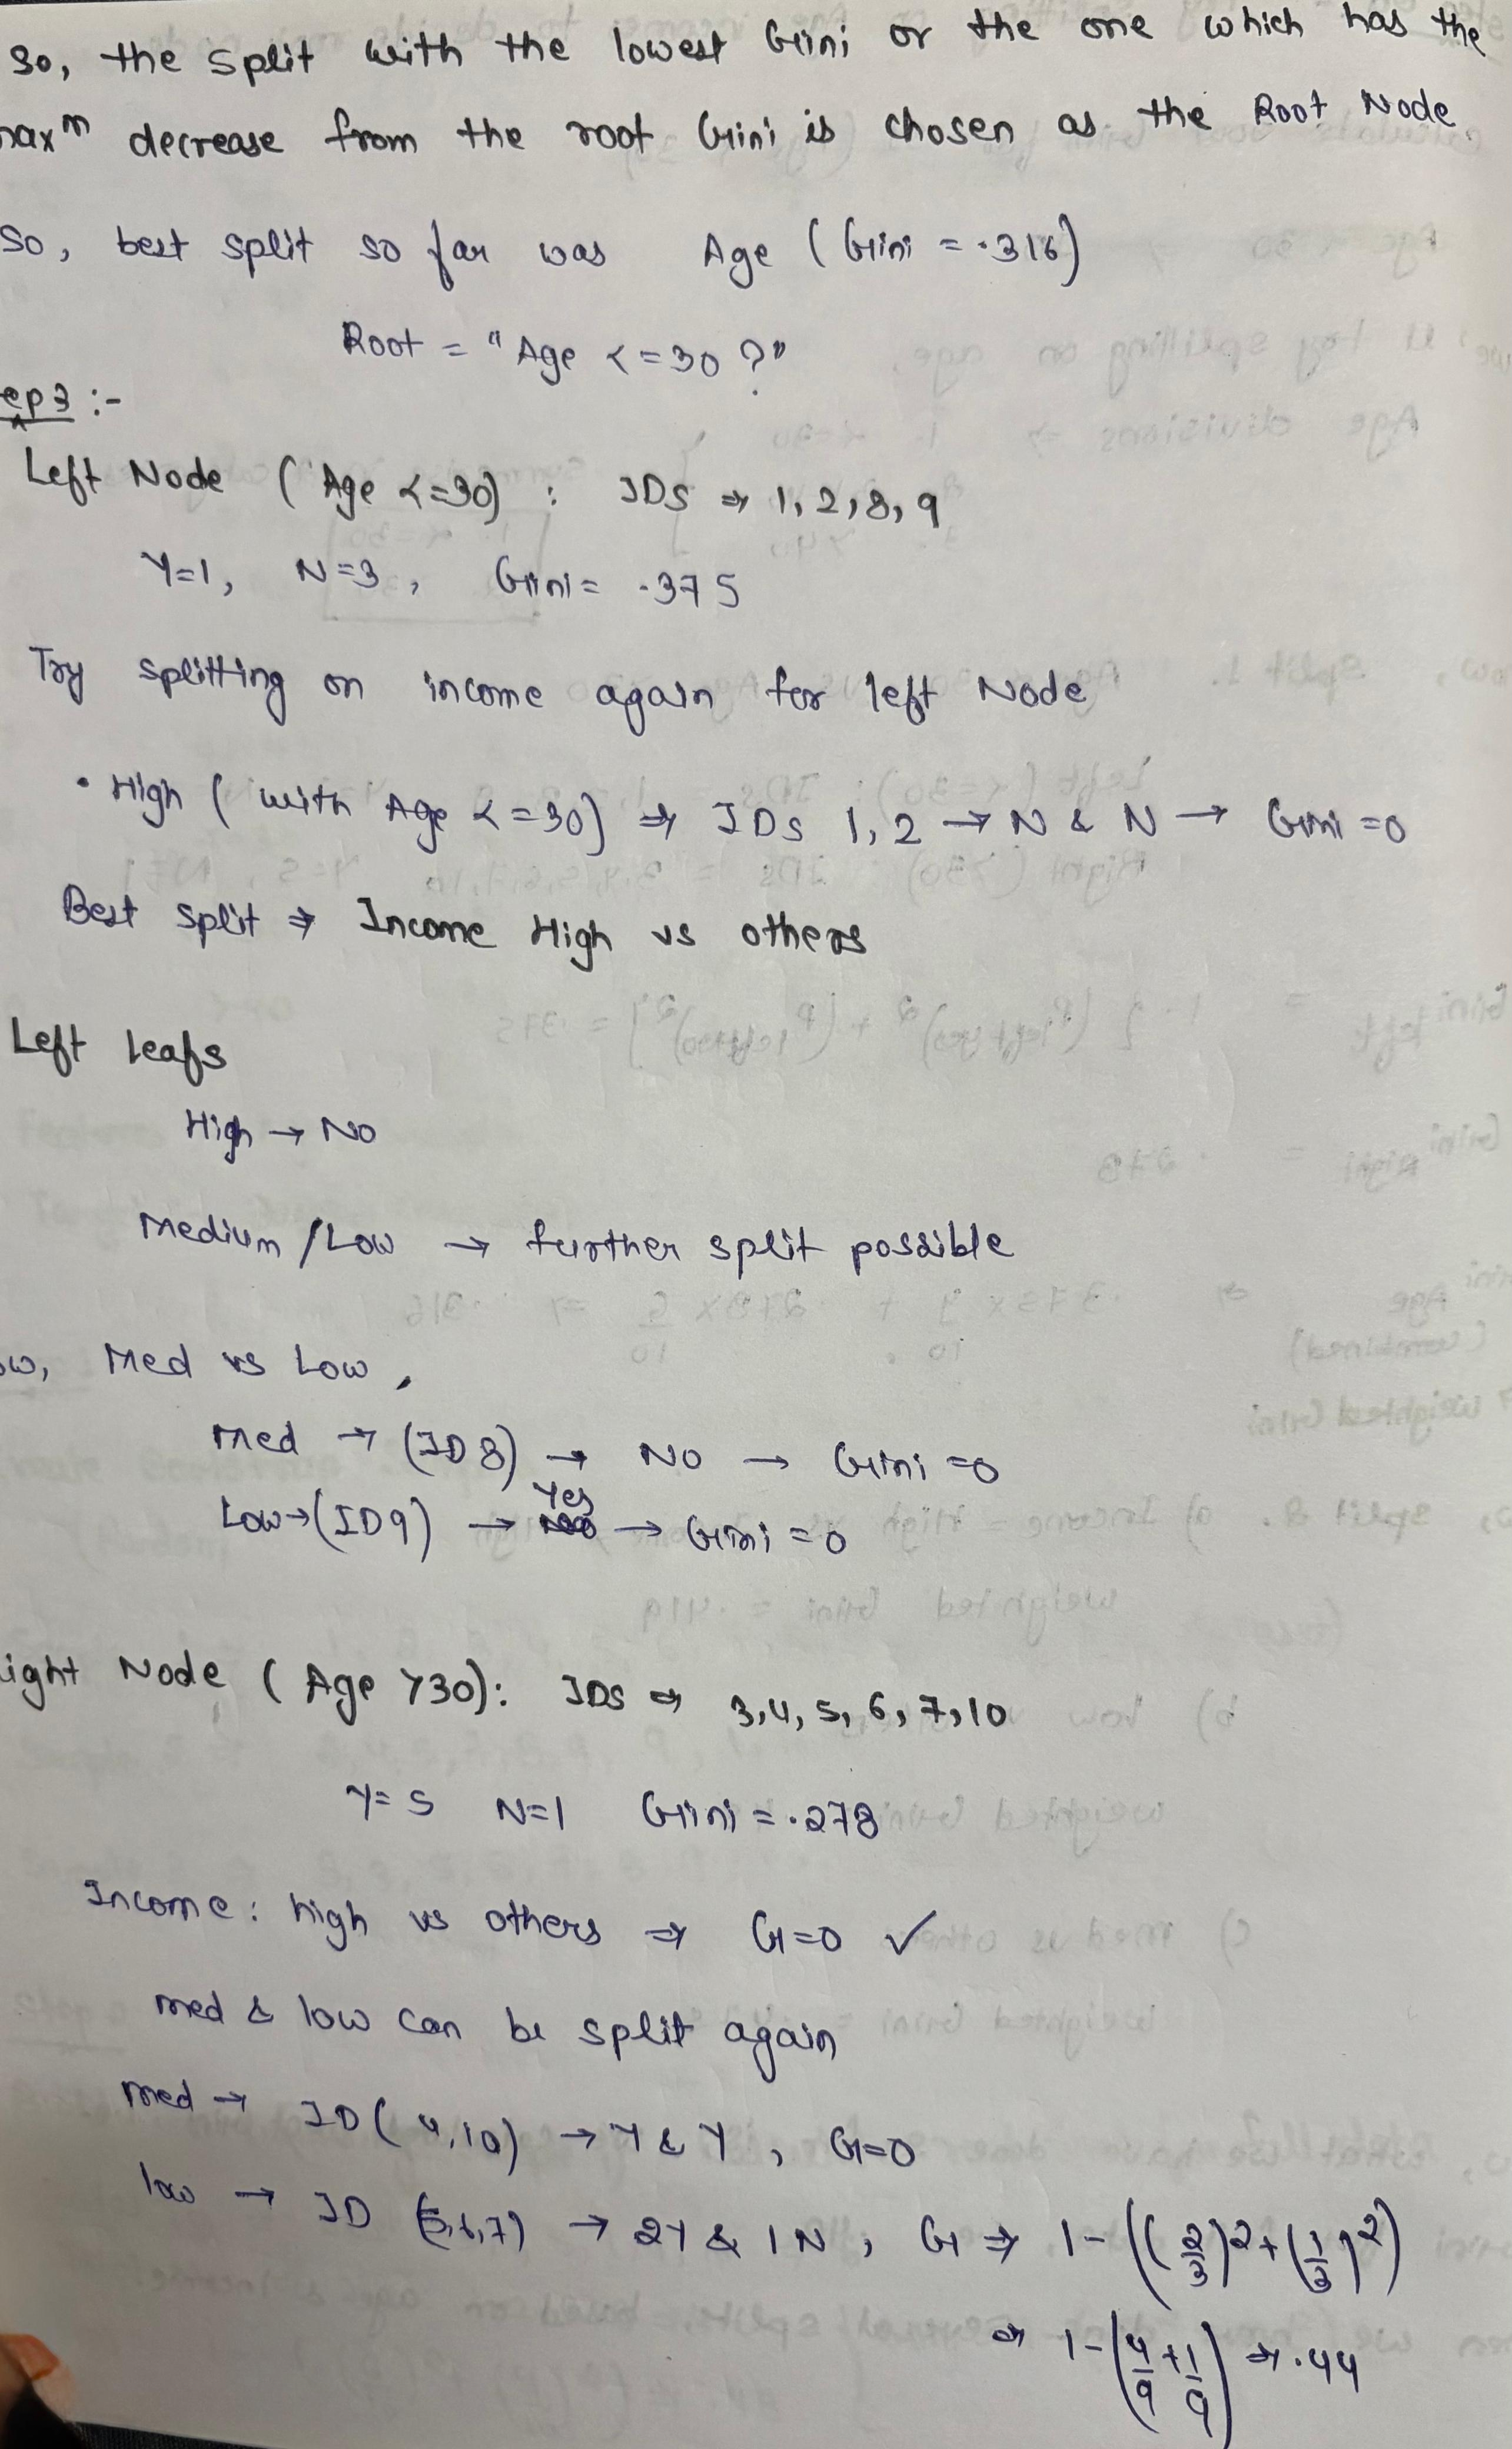

In [4]:
display(Image(filename=r"C:\Users\kesha\ML\anaconda_projects\db\My Jupyter Notebooks\Random_Forests\img (4).jpg", width=800, height=600))

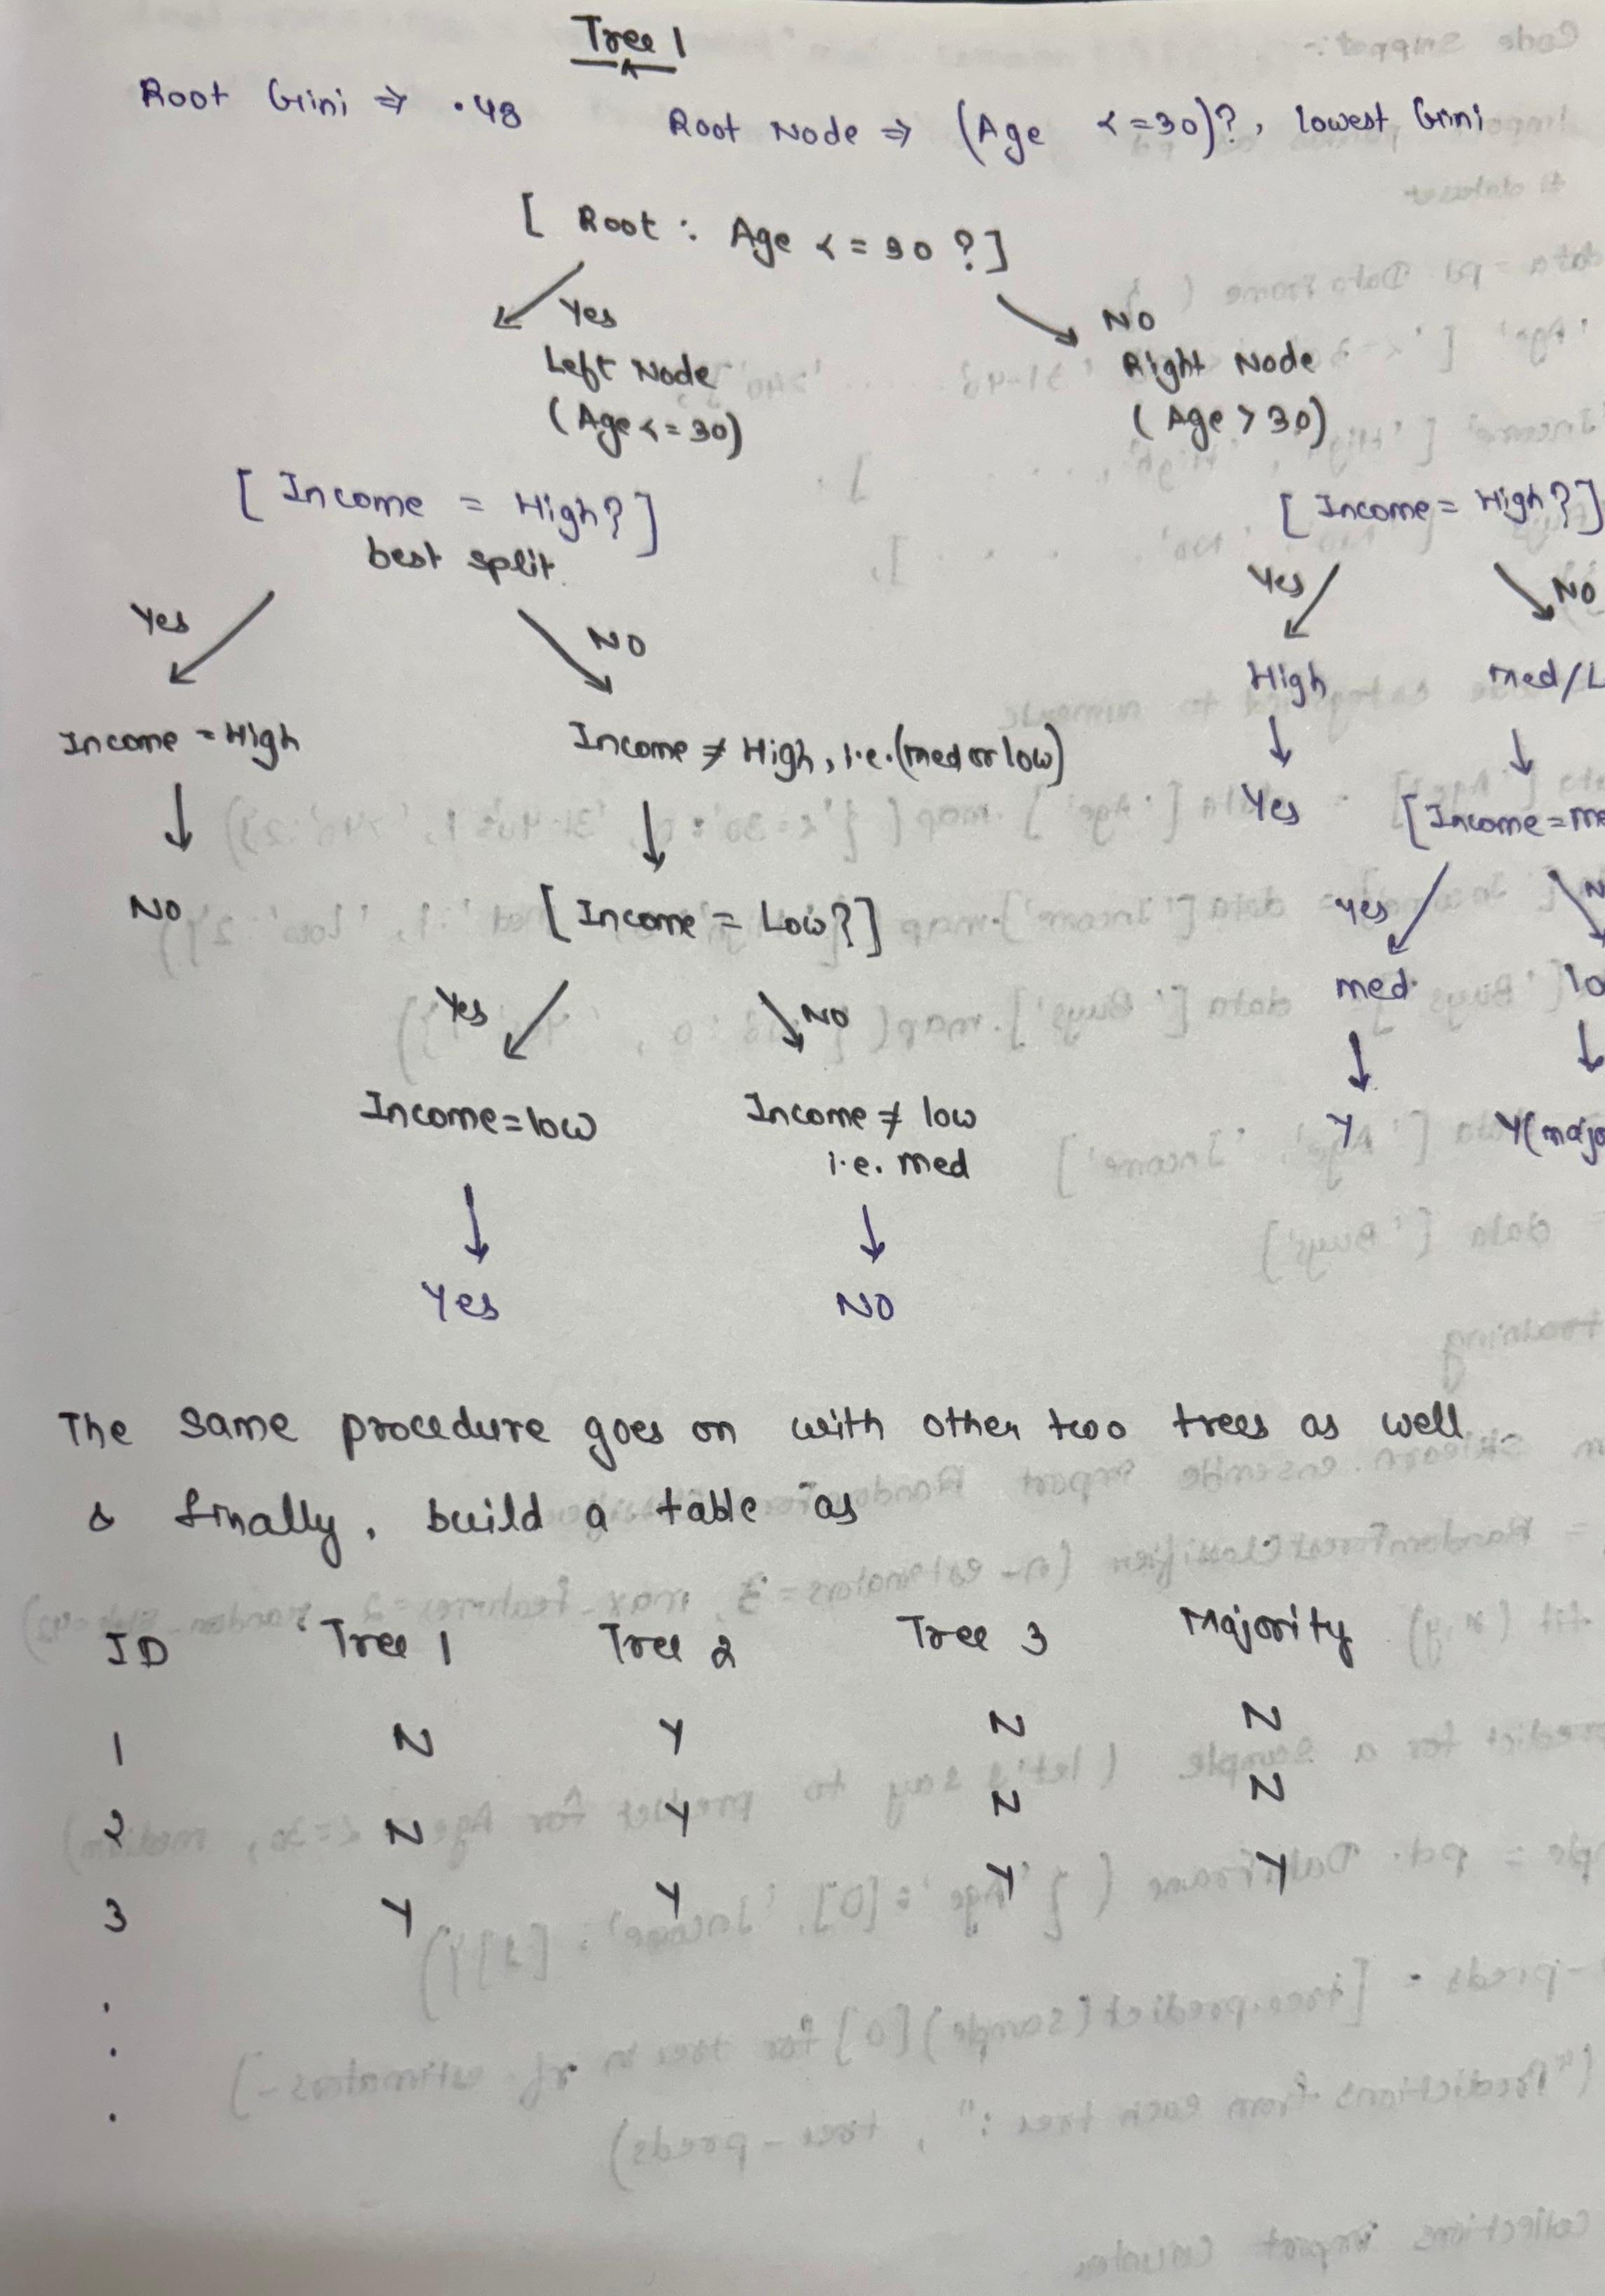

In [5]:
display(Image(filename=r"C:\Users\kesha\ML\anaconda_projects\db\My Jupyter Notebooks\Random_Forests\img (5).jpg", width=800, height=600))

In [7]:
from IPython.display import IFrame

pdf_path = r"C:\Users\kesha\ML\anaconda_projects\db\My Jupyter Notebooks\Random_Forests\RF_Notes.pdf"

# Display the PDF inline
IFrame(pdf_path, width=800, height=600)



,Age,Income,Buys
0,0,2,0
1,0,2,0
2,1,2,1
3,2,1,1
4,2,0,1
5,2,0,0
6,1,0,1
7,0,1,0
8,0,0,1
9,2,1,1


In [8]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=5, max_features=2, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(max_features=2, n_estimators=5, random_state=42)

In [11]:
# Predict on test set
y_pred = rf.predict(X_test)
# Pick a sample from test set
sample = X_test.iloc[[0]]

# Convert to numpy array to avoid warnings
sample_array = sample.to_numpy()

# Predictions from each tree
tree_preds = [tree.predict(sample_array)[0] for tree in rf.estimators_]
print("Predictions from each tree:", tree_preds)

# Final prediction by majority vote
from collections import Counter
vote_count = Counter(tree_preds)
final_prediction = vote_count.most_common(1)[0][0]
print("Random Forest final prediction for sample:", "Yes" if final_prediction==1 else "No")



Predictions from each tree: [1.0, 1.0, 0.0, 0.0, 1.0]
Random Forest final prediction for sample: Yes


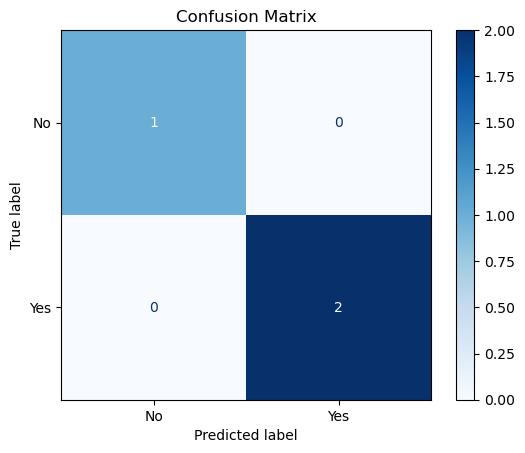

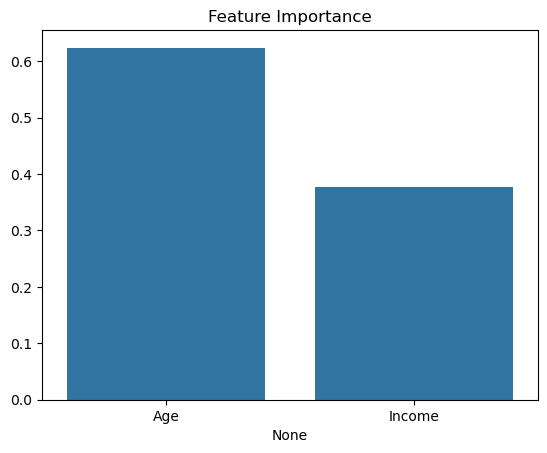

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
import seaborn as sns

importance = rf.feature_importances_
sns.barplot(x=X.columns, y=importance)
plt.title("Feature Importance")
plt.show()


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


- Random Forest can correctly classify the test samples most of the time.  
- Each tree may vote differently, but ensemble voting reduces errors.  
- Feature importance shows which feature contributes more to the decision.  
- Limitations: Small dataset → Random Forest isn’t fully utilized; more data gives better performance.  


- Random Forests are powerful for supervised learning tasks.  
- Ensemble of trees reduces overfitting compared to a single tree.  
- Provides interpretable insights like feature importance.  
- Can be applied to classification and regression problems in real-world scenarios.  


## Now, after getting our hands on this algorithm with a simple dataset, we will now try working it out with a commonly used dataset"The Titanic"

In [16]:
from sklearn.datasets import fetch_openml

# Load Titanic dataset
titanic = fetch_openml("titanic", version=1, as_frame=True)
df = titanic.frame

# Display the first few rows
df.head(10)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define features and target
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']

# Define categorical and numerical features
categorical_features = ['sex', 'embarked']
numerical_features = ['pclass', 'age', 'sibsp', 'parch', 'fare']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline that combines preprocessing and modeling
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7977099236641222

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       144
           1       0.82      0.70      0.76       118

    accuracy                           0.80       262
   macro avg       0.80      0.79      0.79       262
weighted avg       0.80      0.80      0.80       262


Confusion Matrix:
 [[126  18]
 [ 35  83]]


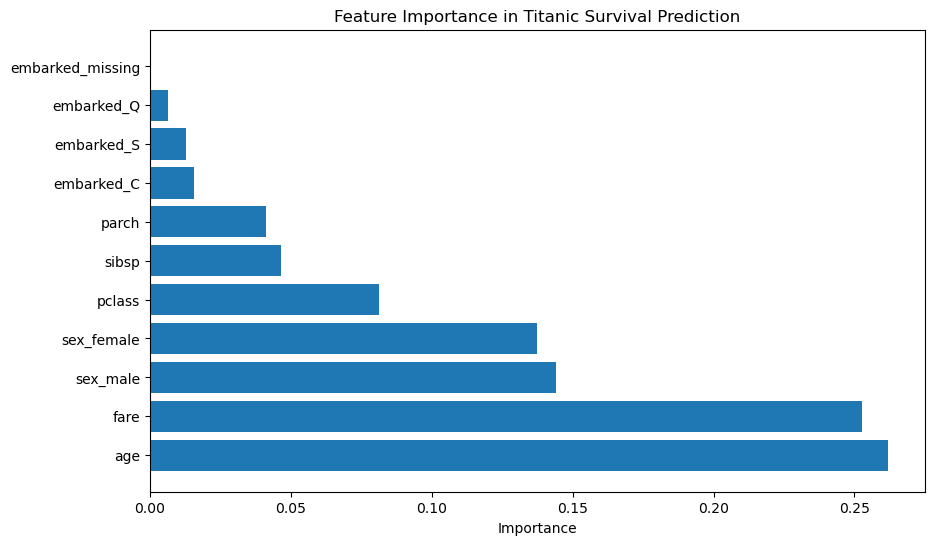

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances
importances = model.named_steps['classifier'].feature_importances_

# Get feature names after one-hot encoding
encoded_columns = model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
all_columns = numerical_features + list(encoded_columns)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': all_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Titanic Survival Prediction')
plt.show()


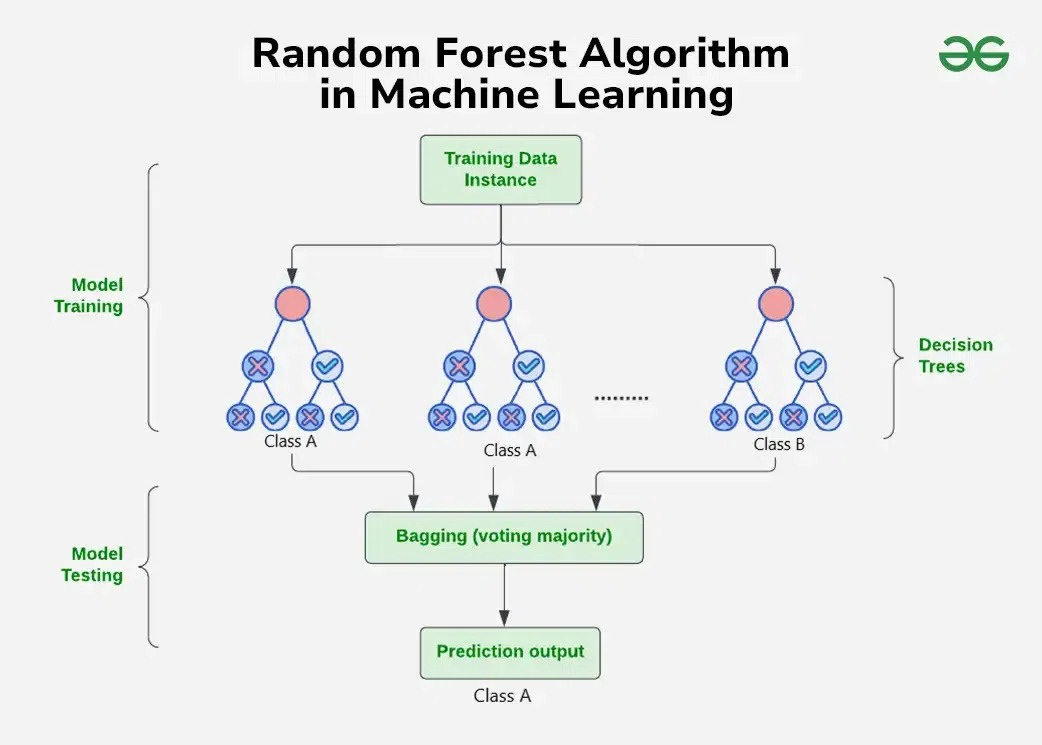

In [3]:
from IPython.display import Image, display

display(Image(filename=r"C:\Users\kesha\ML\anaconda_projects\db\My Jupyter Notebooks\Random_Forests\img.jpg", width=800, height=600))

## 🧠 Model Comparison: Random Forests vs. Other Algorithms

| **Model** | **Description** | **Accuracy** | **Training Time** | **Model Size** | **Interpretability** |
|:-----------|:----------------|:--------------:|:------------------:|:----------------:|:----------------:|
| **Decision Tree** | A single tree that splits data based on feature values. Simple but prone to overfitting. | Medium | Very Fast | Small | Very Easy |
| **Random Forest** | An ensemble of many Decision Trees combined to reduce overfitting and increase accuracy. | High | Moderate | Large | Moderate |
| **Logistic Regression** | A linear model that predicts probabilities using a sigmoid function. | Medium | Very Fast | Small | Very High |
| **Support Vector Machine (SVM)** | Classifies data by finding the best separating hyperplane in a high-dimensional space. | High | Slow | Medium | Moderate |
| **k-Nearest Neighbors (kNN)** | Predicts the label by looking at the closest data points in feature space. | Medium | Slow (during prediction) | Small | Easy |
| **Neural Network (MLP)** | Multiple layers of neurons that learn complex patterns from data. | Very High | Slow | Large | Hard |

---

### ⚙️ Summary

- 🏆 **Random Forests** give **high accuracy** for both categorical and numerical data, especially on structured/tabular datasets.  
- 🐢 Training time is **slower than a single Decision Tree** but **faster than Neural Networks** or **SVMs**.  
- 📦 The **model size** increases with the number of trees since each tree is stored individually.  
- 🔍 Although less interpretable than simpler models, **feature importance** in Random Forests helps understand which features matter most.  
- 💡 In practice:  
  - For quick and interpretable results → **Decision Tree / Logistic Regression**  
  - For maximum accuracy with less tuning → **Random Forest**  
  - For very large and complex data → **Neural Network / SVM**
